In [1]:
# Aliakbar Zarkoob, AKA "XIV"
# Gmail: XIV.Aliakbar.Zarkoob@gmail.com
# Telegram: @XIVAliakbar

import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def PlotRes(lon_l, lat_l, data_l, title_l, lon_r, lat_r, data_r, title_r, title_sup, save_flag, save_format, save_dir, save_filename, save_dpi, sci_cb):

    import os 
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import FuncFormatter
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    def format_ticks(x, pos):
        return f"{x:.0f}"
    
    if save_flag:
        if not os.path.isdir(save_dir):
            os.mkdir(save_dir)
    
    lon_l = np.unique(lon_l)
    lat_l = np.unique(lat_l)
    lon_l, lat_l = np.meshgrid(lon_l, lat_l)
    data_l = data_l.reshape((lon_l.shape[1], lon_l.shape[0])).T
    
    lat_r = np.unique(lat_r)
    lon_r = np.unique(lon_r)
    lon_r, lat_r = np.meshgrid(lon_r, lat_r)
    data_r = data_r.reshape((lon_r.shape[1], lon_r.shape[0])).T
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.Robinson()})

    ax1 = axes[0]
    ax1.set_title(title_l,fontsize=15)
    cmap = plt.cm.turbo
    mesh1 = ax1.pcolormesh(lon_l, lat_l, data_l, cmap=cmap, transform=ccrs.PlateCarree())
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar1 = plt.colorbar(mesh1, cax=cax1, orientation='horizontal')
    cbar1.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar1.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    ax2 = axes[1]
    ax2.set_title(title_r,fontsize=15)
    mesh2 = ax2.pcolormesh(lon_r, lat_r, data_r, cmap=cmap, transform=ccrs.PlateCarree())
    ax2.coastlines()
    ax2.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar2 = plt.colorbar(mesh2, cax=cax2, orientation='horizontal')
    cbar2.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar2.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    for ax in axes:
        gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
        gl.top_labels = False
        gl.right_labels = True
        gl.xlabel_style = {"fontsize": 10, "rotation": 0}
        gl.ylabel_style = {"fontsize": 10, "rotation": 0}
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER


    plt.suptitle(title_sup, fontsize=20)
    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 1.3])
    fig.subplots_adjust(wspace=0.1)

    if save_flag:
        plt.savefig(save_dir+save_filename+save_format, bbox_inches='tight', dpi=save_dpi)
    plt.show()

def PlotCV(dec1, dec2, dec3, title_sup, save_flag, save_format, save_dir, save_filename):
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8,7))
    
    plt.subplot(3, 1, 1)
    plt.plot(dec1[:, 0], dec1[:, 1], marker='.', color='k', markersize=10, linewidth=2)
    idx = np.argmin(dec1[:, 1])
    plt.plot(dec1[idx, 0], dec1[idx, 1], marker='.', color='r', markersize=15)
    plt.xticks(dec1[:, 0], rotation=45)
    plt.grid()
    plt.xlabel('$h$')
    plt.ylabel('$||S-\hat{S}||$')
    
    plt.subplot(3, 1, 2)
    plt.plot(dec2[:, 0], dec2[:, 1], marker='.', color='k', markersize=10, linewidth=2)
    idx = np.argmin(dec2[:, 1])
    plt.plot(dec2[idx, 0], dec2[idx, 1], marker='.', color='r', markersize=15)
    plt.xticks(dec2[:, 0], rotation=45)
    plt.grid()
    plt.xlabel('$h$')
    plt.ylabel('$||S-\hat{S}||$')
    
    plt.subplot(3, 1, 3)
    plt.plot(dec3[:, 0], dec3[:, 1], marker='.', color='k', markersize=10, linewidth=2)
    idx = np.argmin(dec3[:, 1])
    plt.plot(dec3[idx, 0], dec3[idx, 1], marker='.', color='r', markersize=15)
    plt.xticks(dec3[:, 0], rotation=45)
    plt.grid()
    plt.xlabel('$h$')
    plt.ylabel('$||S-\hat{S}||$')
    
    plt.suptitle(title_sup)
    plt.tight_layout()
    
    if save_flag:
        plt.savefig(save_dir+save_filename+save_format, bbox_inches='tight')
    plt.show()
    
def PlotRes_single(lon, lat, data, title, save_flag, save_format, save_dir, save_filename, save_dpi, sci_cb):

    import os 
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import FuncFormatter
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    def format_ticks(x, pos):
        return f"{x:.0f}"
    
    if save_flag:
        if not os.path.isdir(save_dir):
            os.mkdir(save_dir)
    
    lon = np.unique(lon)
    lat = np.unique(lat)
    lon, lat = np.meshgrid(lon, lat)
    data = data.reshape((lon.shape[1], lon.shape[0])).T
    
    fig = plt.figure(figsize=(7, 3.5))
    ax = plt.axes(projection=ccrs.Robinson())

    plt.title(title,fontsize=15)
    cmap = plt.cm.turbo
    mesh1 = ax.pcolormesh(lon, lat, data, cmap=cmap, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar = plt.colorbar(mesh1, cax=cax, orientation='horizontal')
    cbar.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {"fontsize": 10, "rotation": 0}
    gl.ylabel_style = {"fontsize": 10, "rotation": 0}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 1.3])
    plt.subplots_adjust(wspace=0.1)

    if save_flag:
        plt.savefig(save_dir+save_filename+save_format, bbox_inches='tight', dpi=save_dpi)
    plt.show()

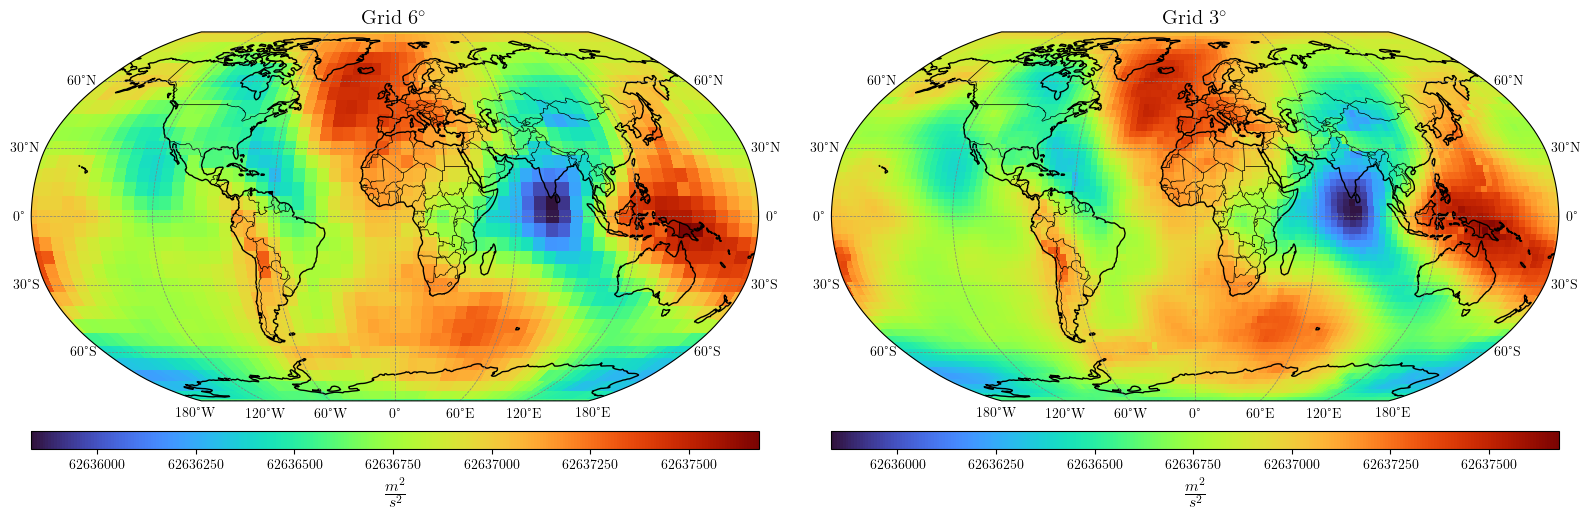

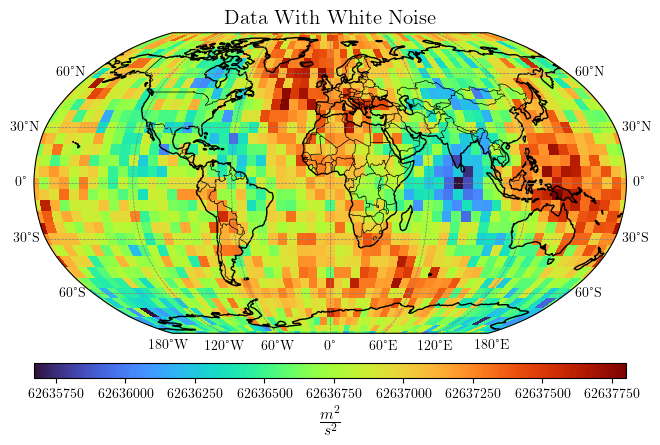

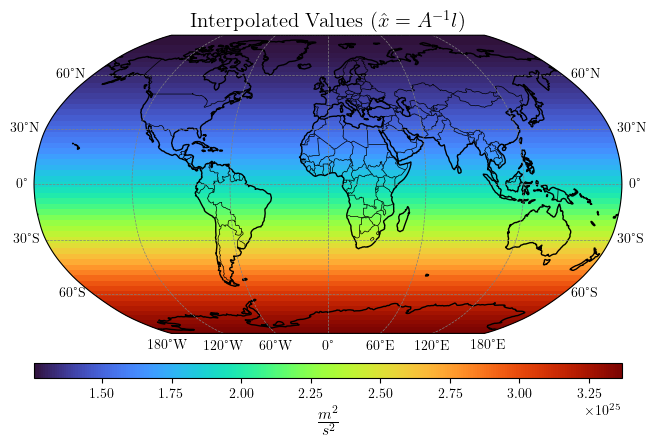

In [2]:
from scipy.io import loadmat

save_flag = True
suptitle_flag = False

save_format = '.pdf'
save_dir = './Plots/'
save_dpi = 72

mat_data = loadmat('MainData.mat')
main_data = mat_data['main_data']
valid_data = mat_data['valid_data']

mat_data = loadmat('NoRegResult.mat')
int_A = mat_data['int_A']
diff_A = mat_data['diff_A']


# Gravity Potential Data From XGM2019
PlotRes(main_data[:, 0], main_data[:, 1], main_data[:, 2], 'Grid $6^\circ$',
        valid_data[:, 0], valid_data[:, 1], valid_data[:, 2], 'Grid $3^\circ$', 
        '', save_flag, save_format, save_dir, 'MainData', save_dpi, True)

PlotRes_single(main_data[:, 0], main_data[:, 1], main_data[:, 3], 'Data With White Noise',
               save_flag, save_format, save_dir, 'DataWithNoise', save_dpi, True)

PlotRes_single(valid_data[:, 0], valid_data[:, 1], int_A, 'Interpolated Values ($\hat{x} = A^{-1}l$)', 
                save_flag, save_format, save_dir, 'NoRegResult', save_dpi, False)



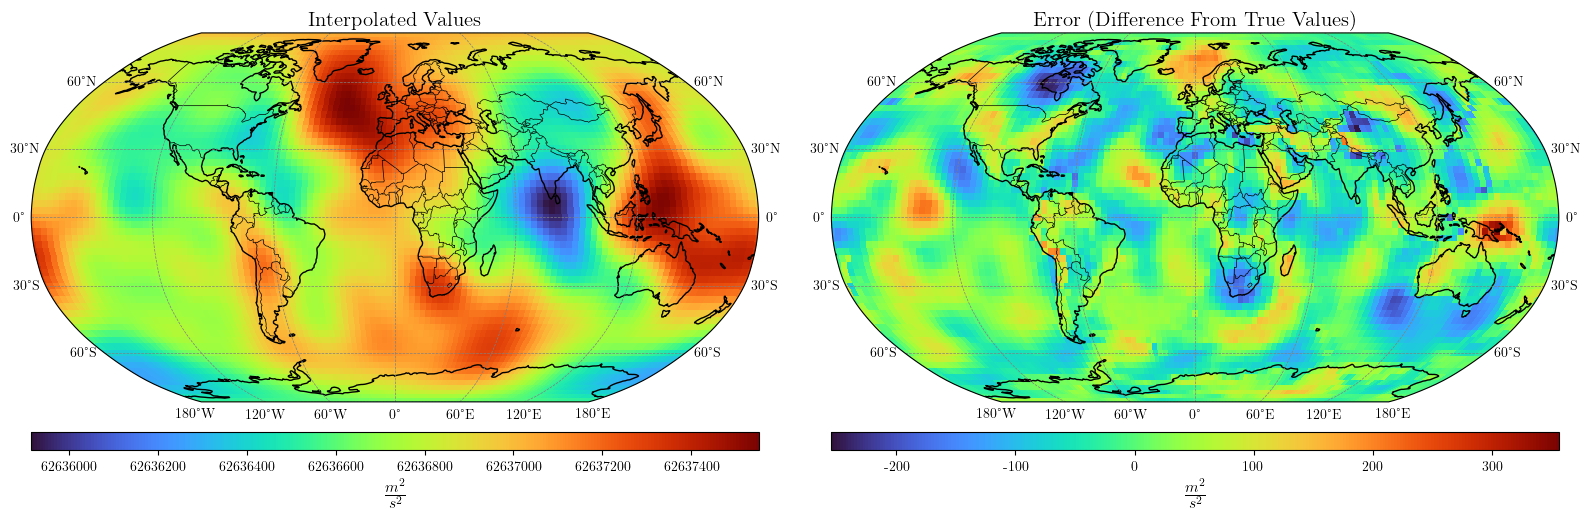

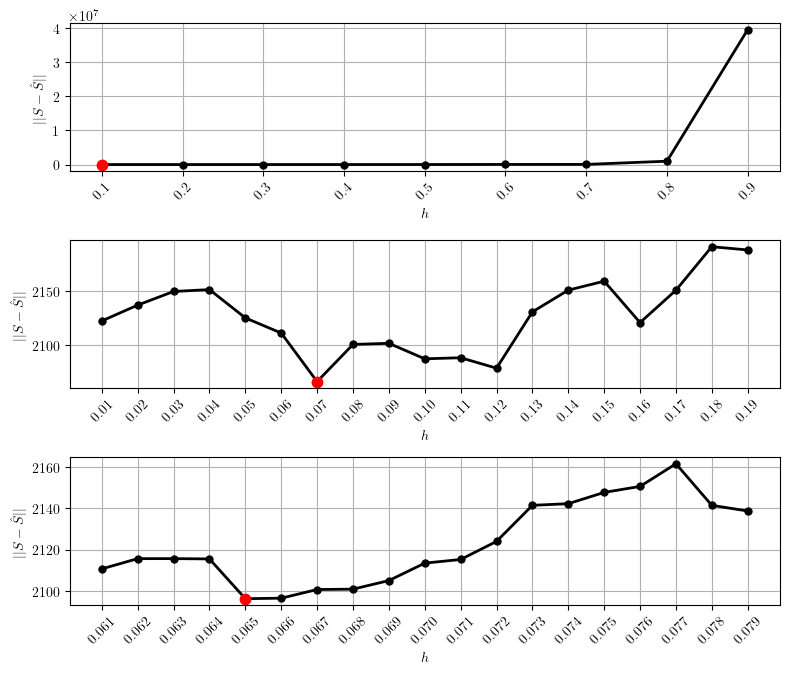

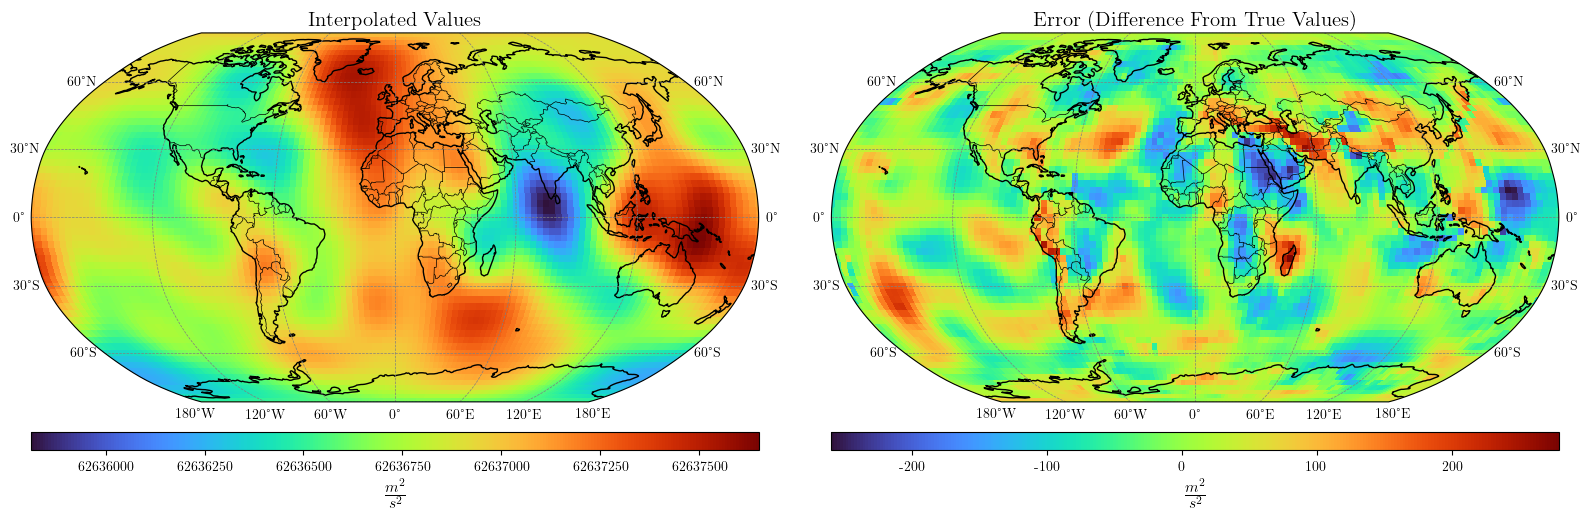

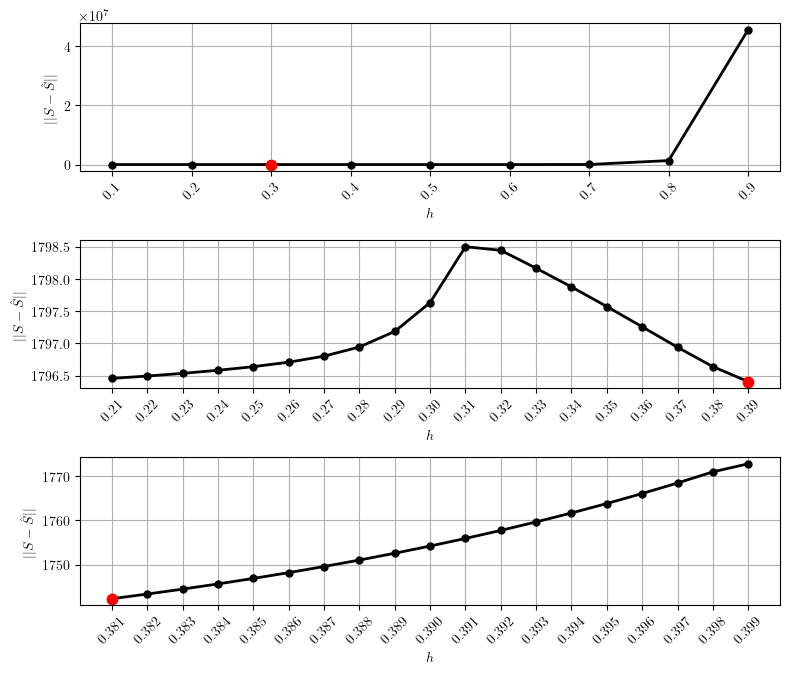

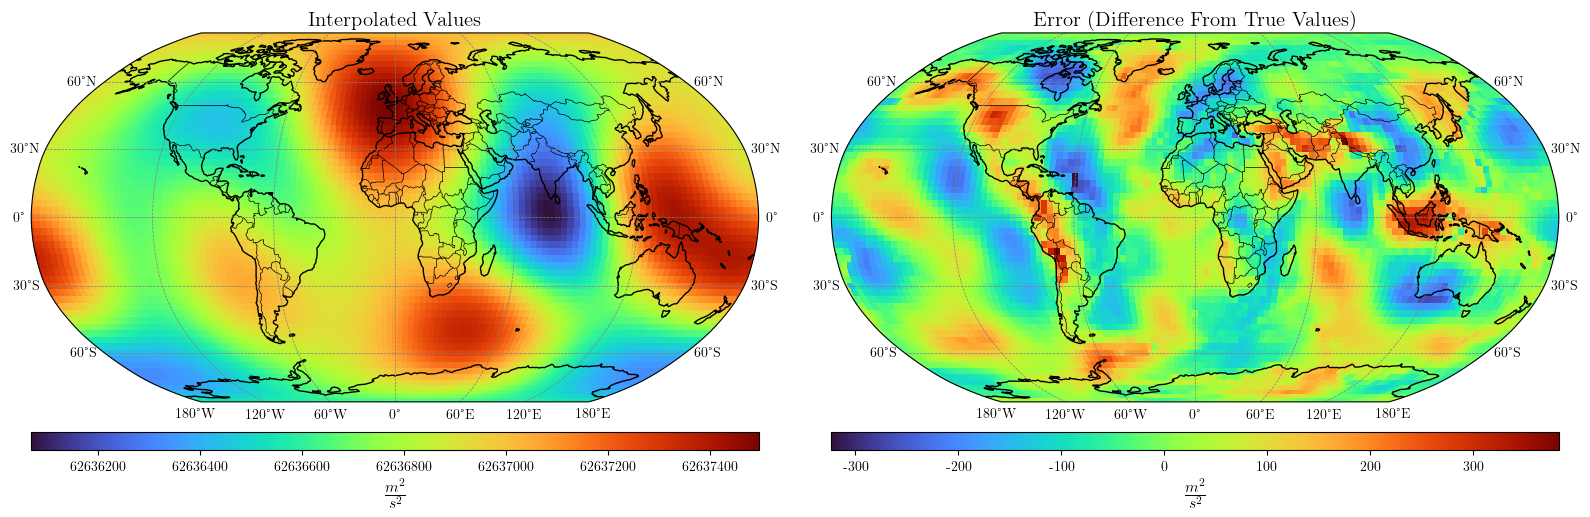

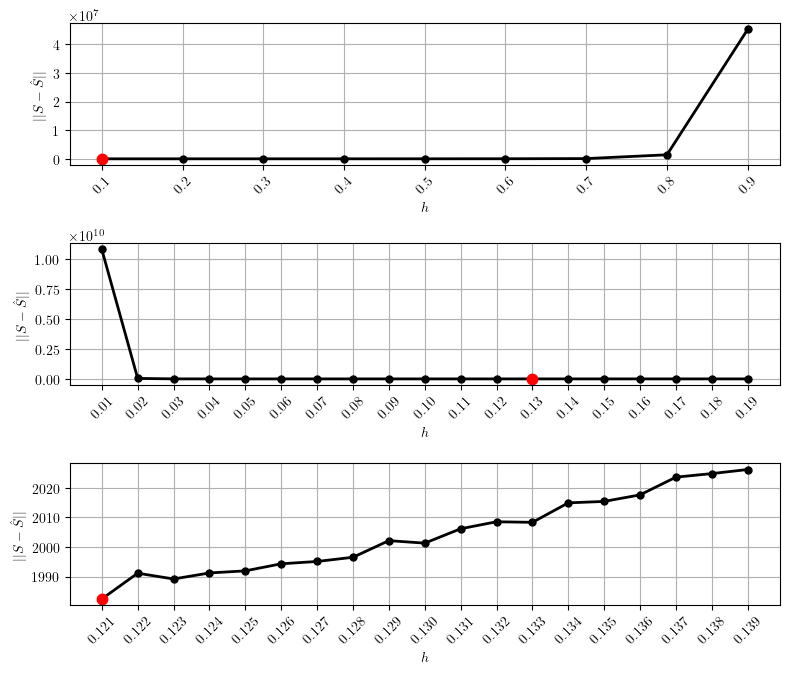

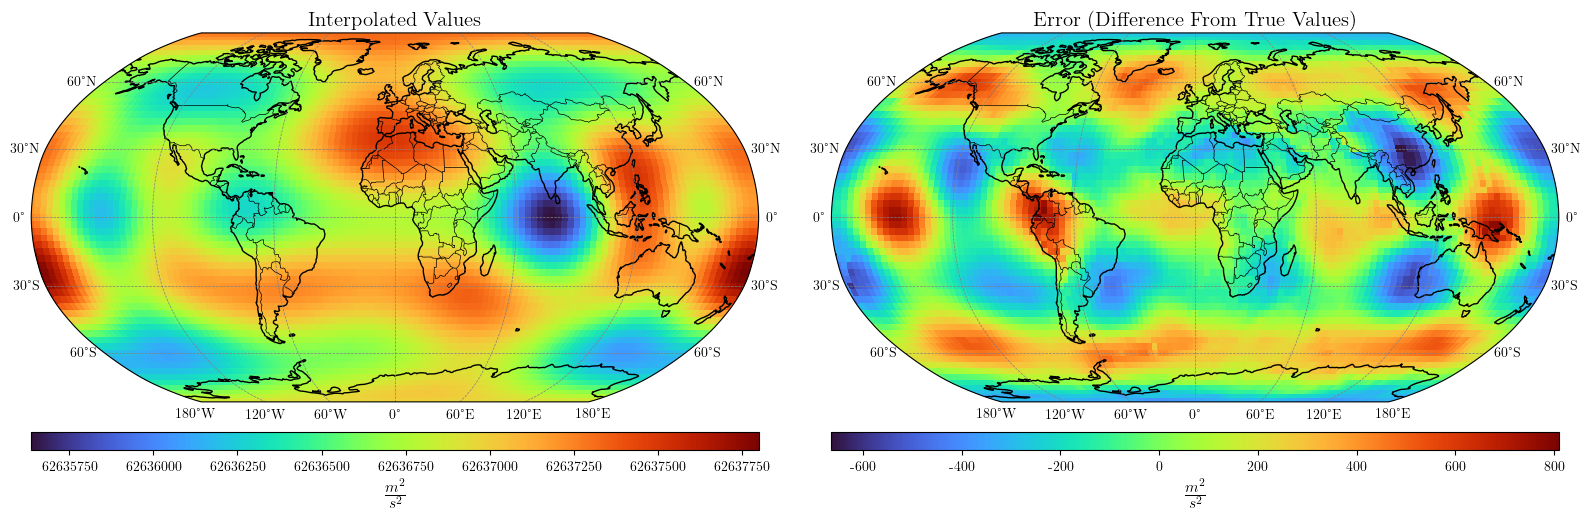

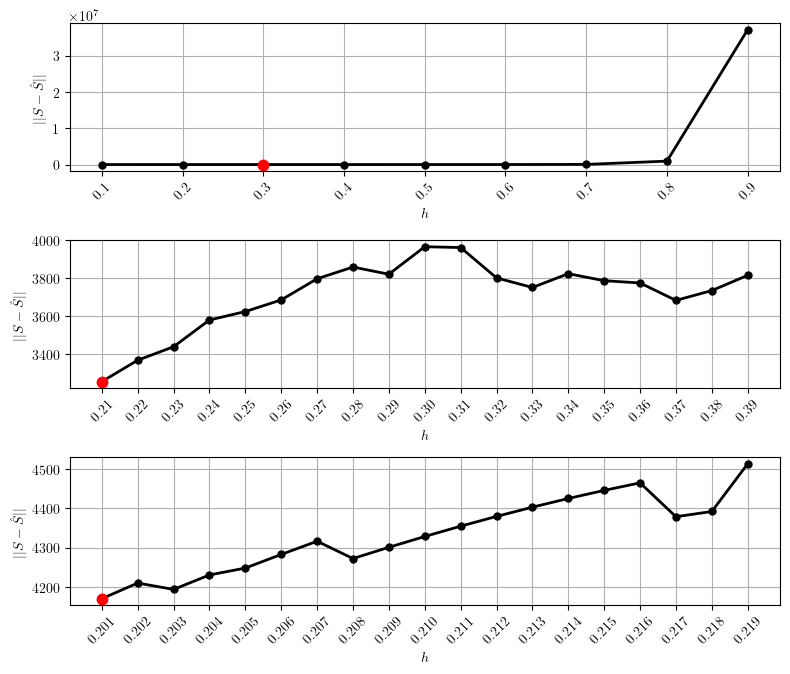

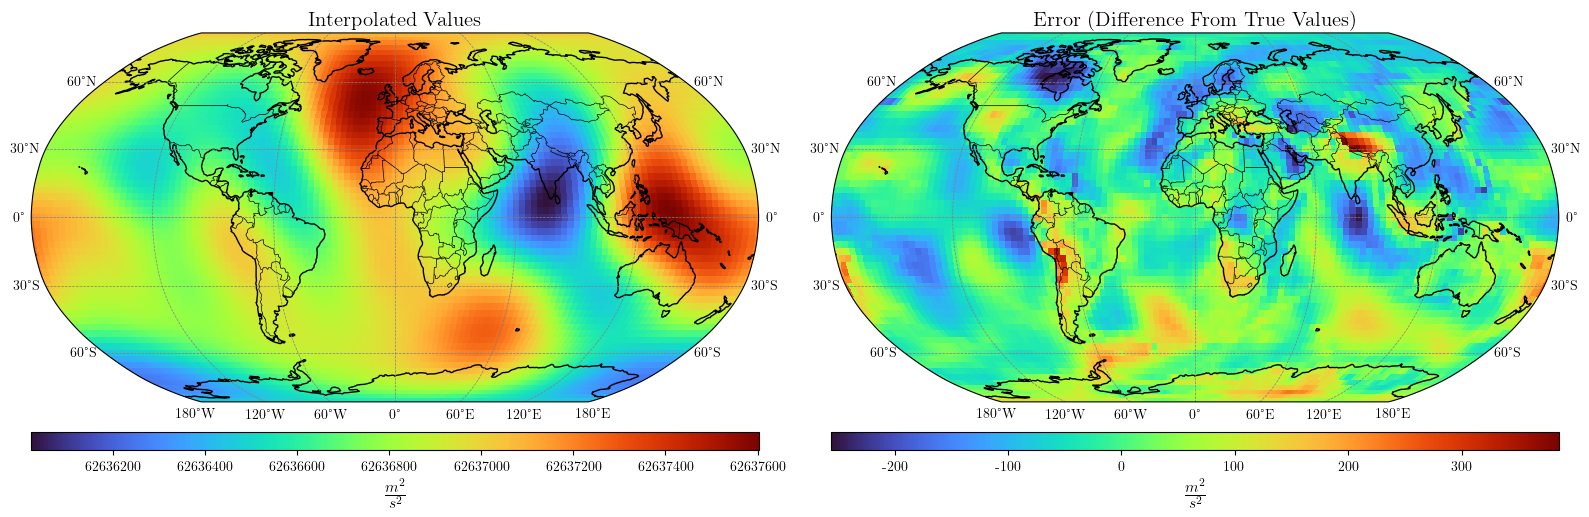

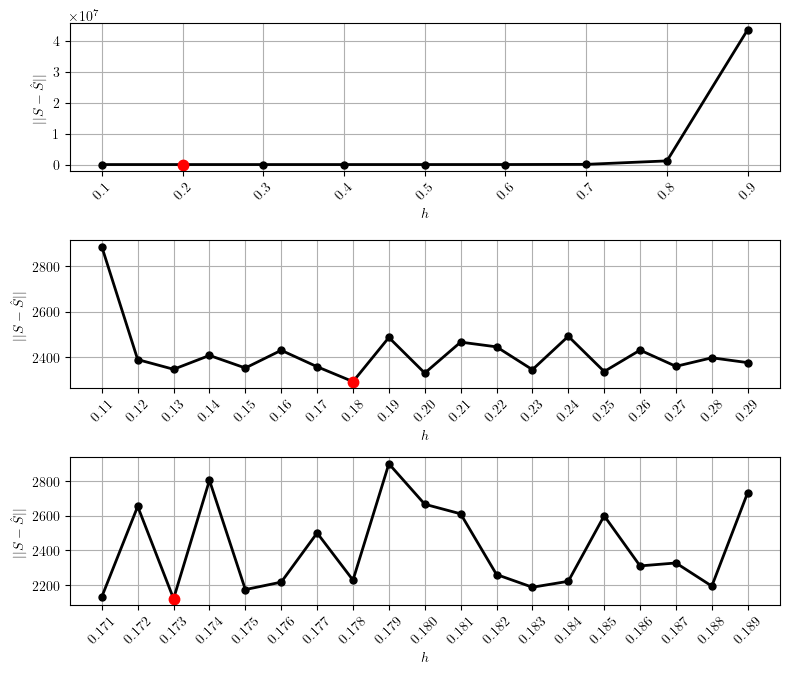

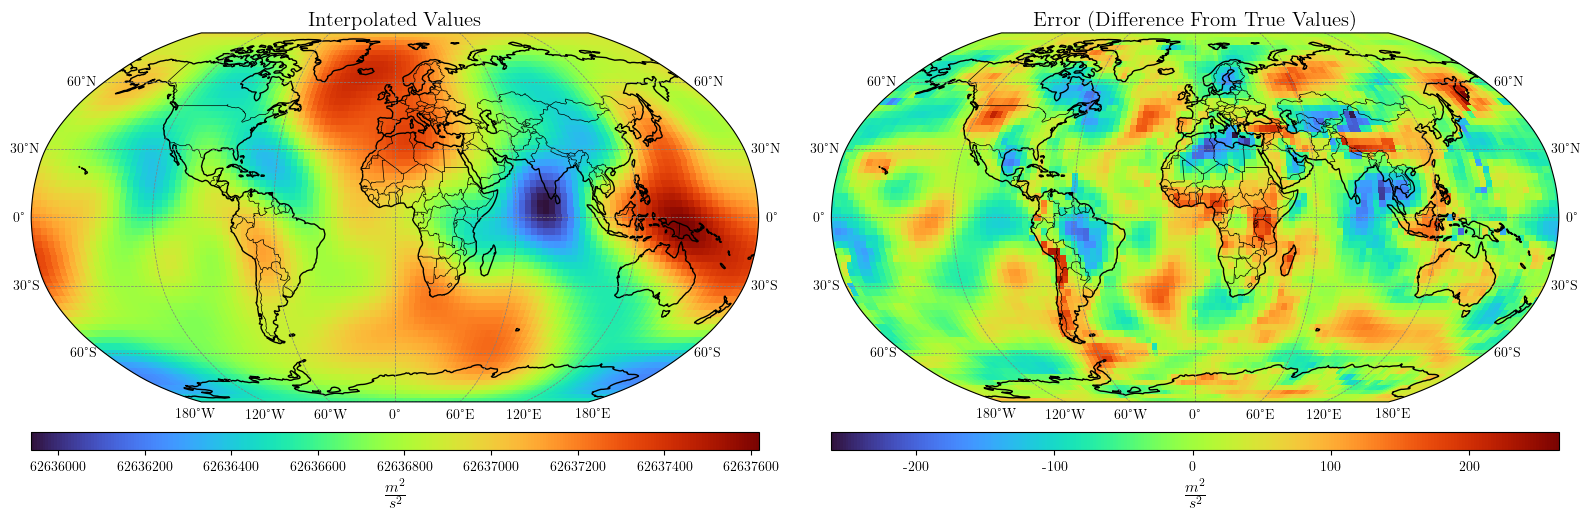

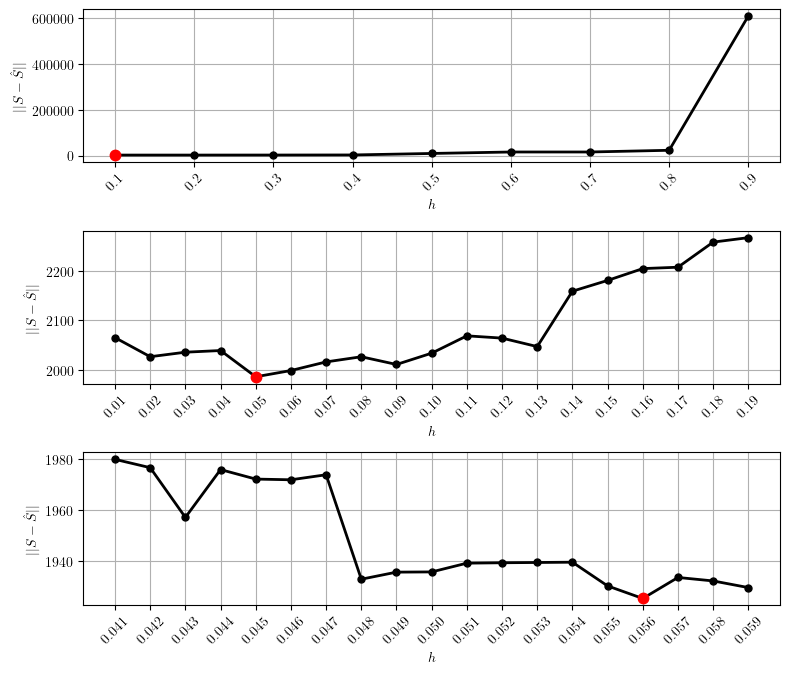

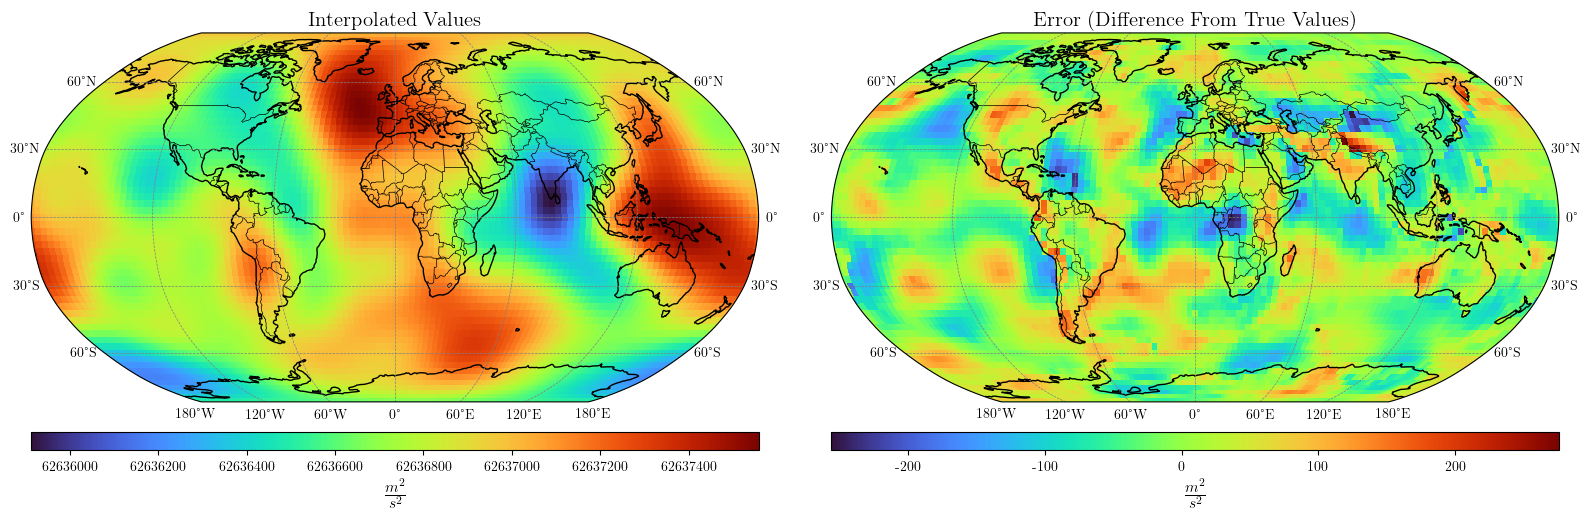

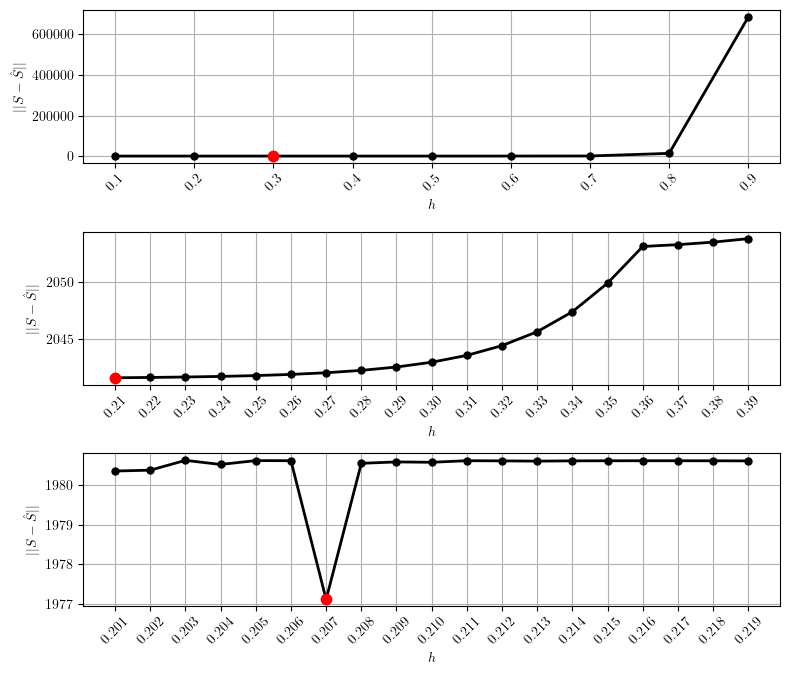

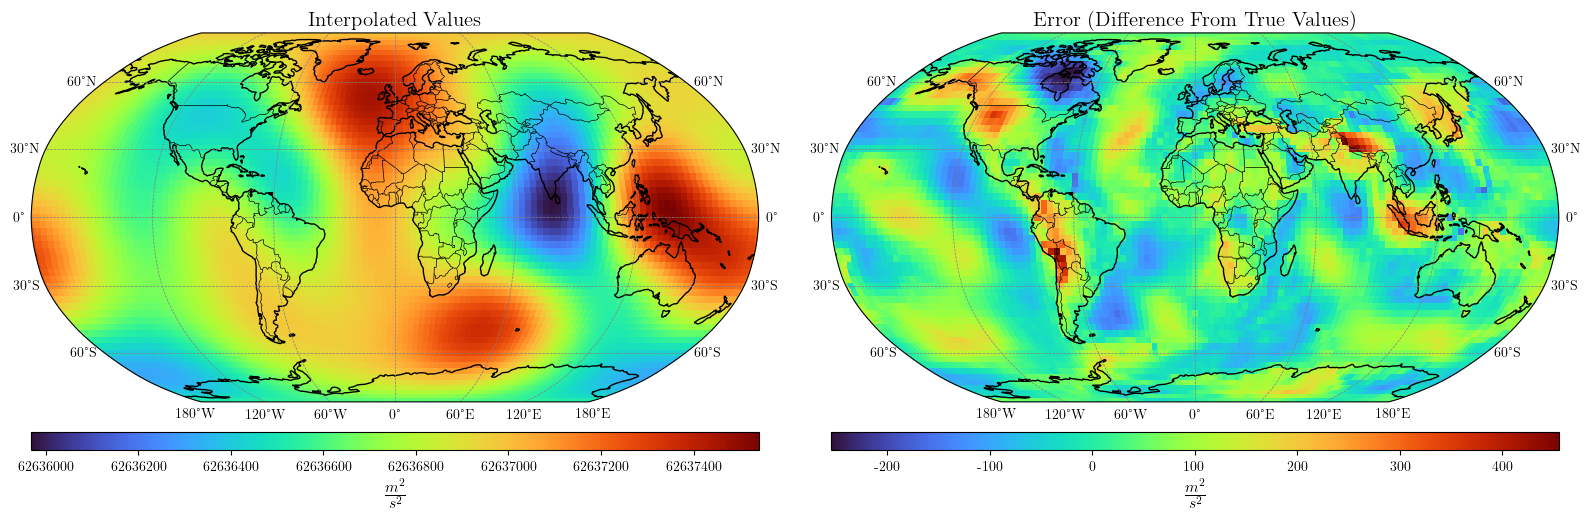

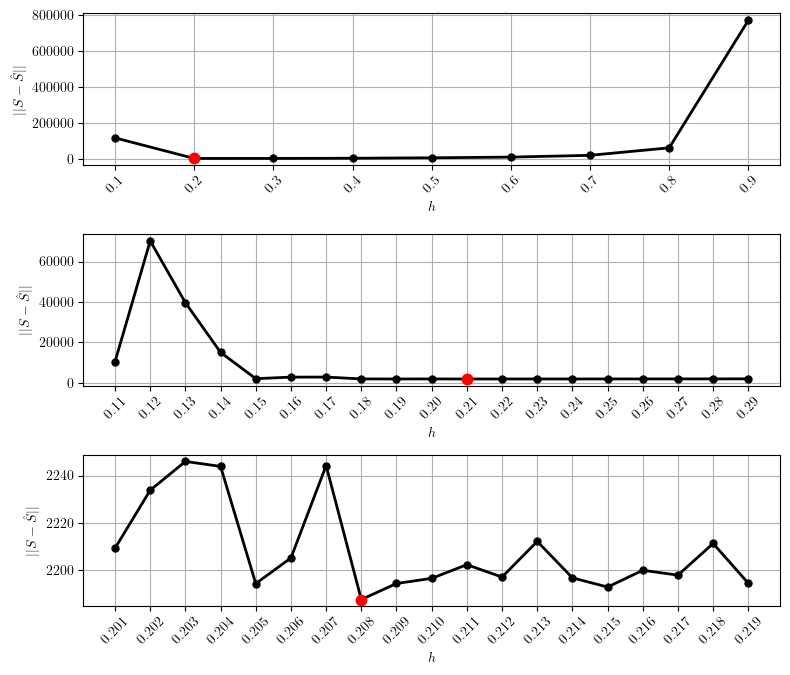

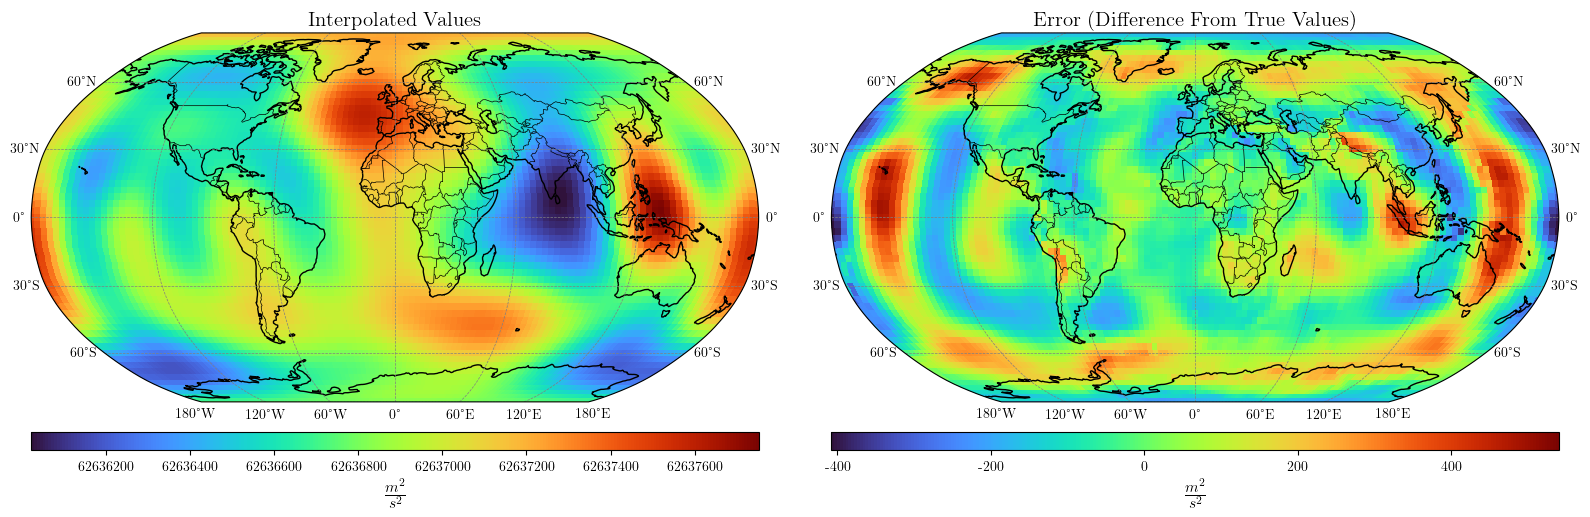

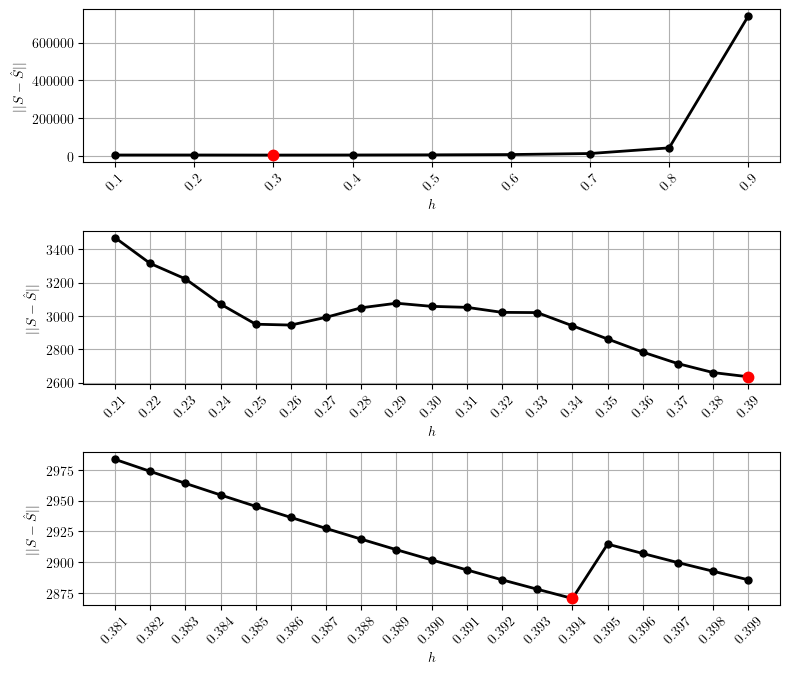

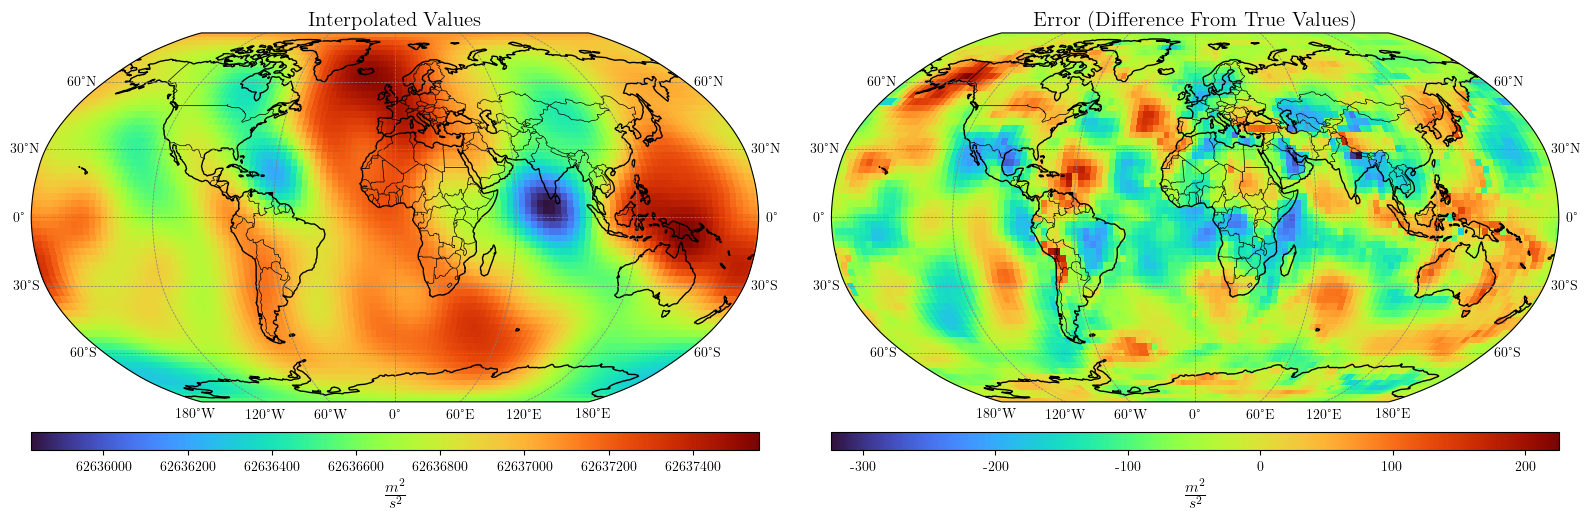

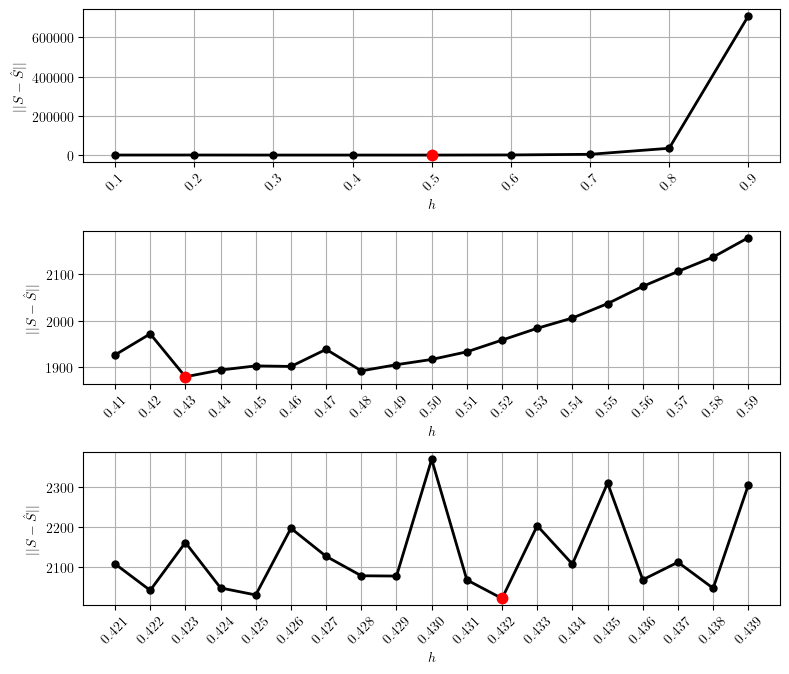

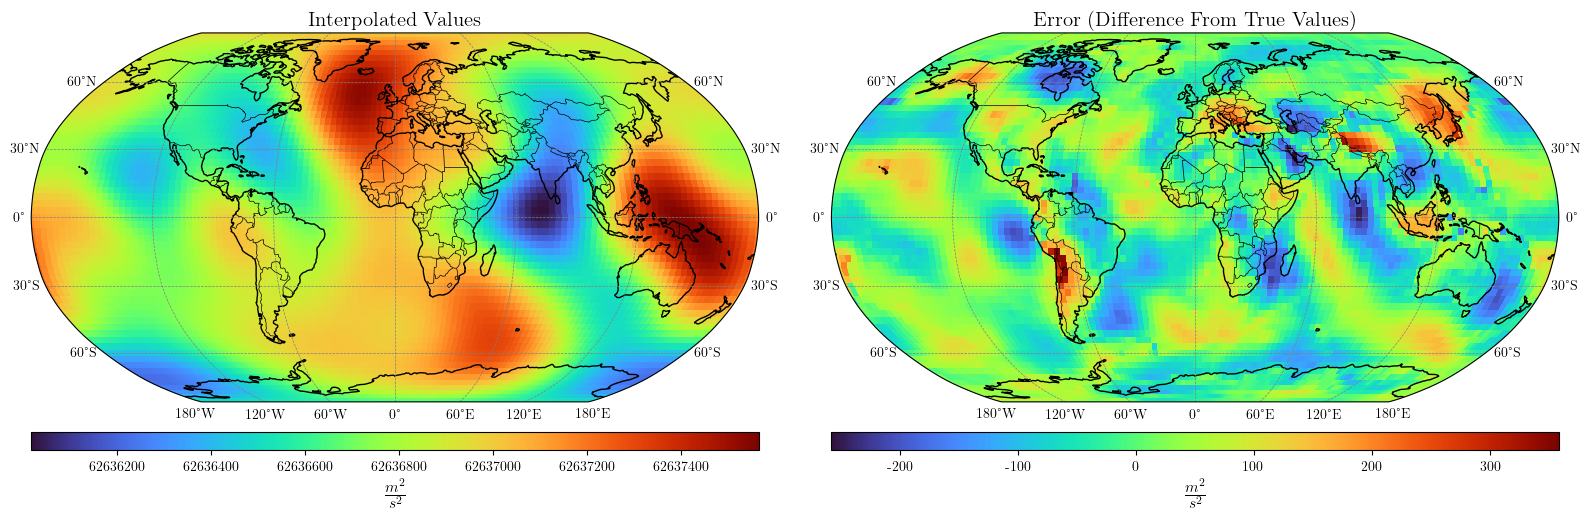

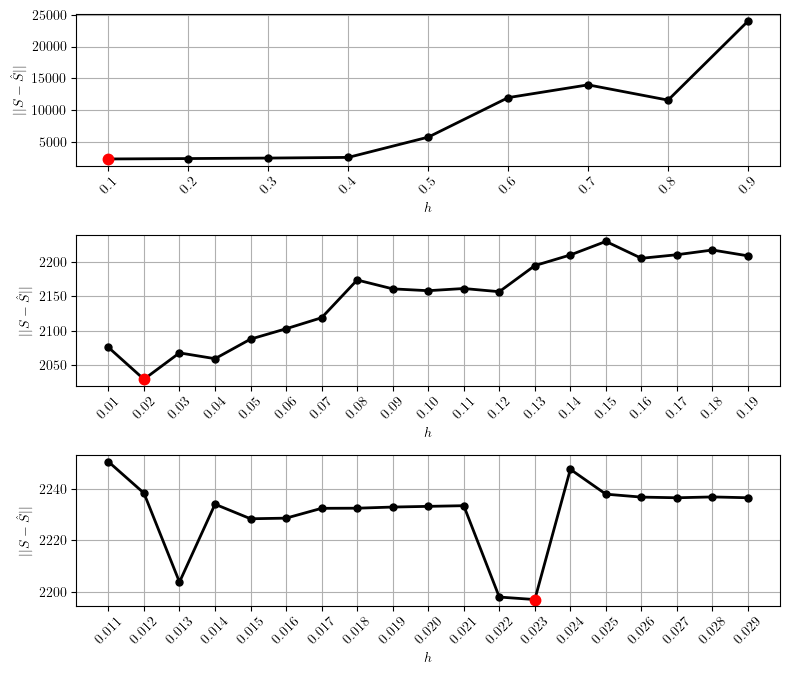

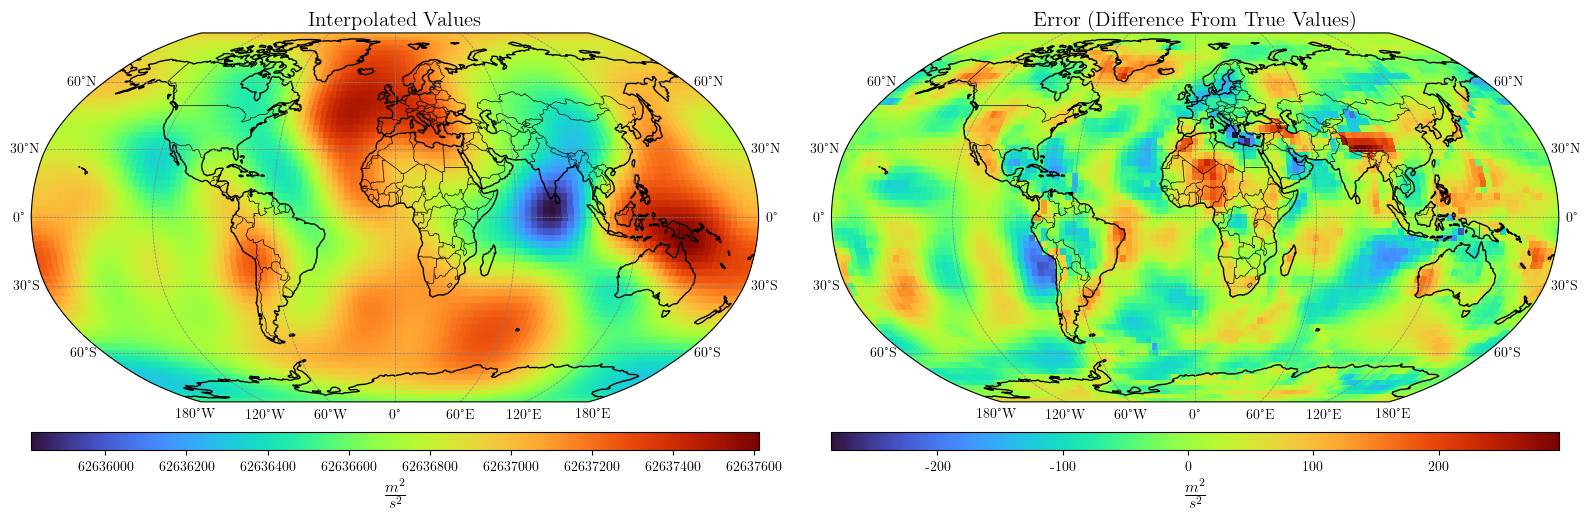

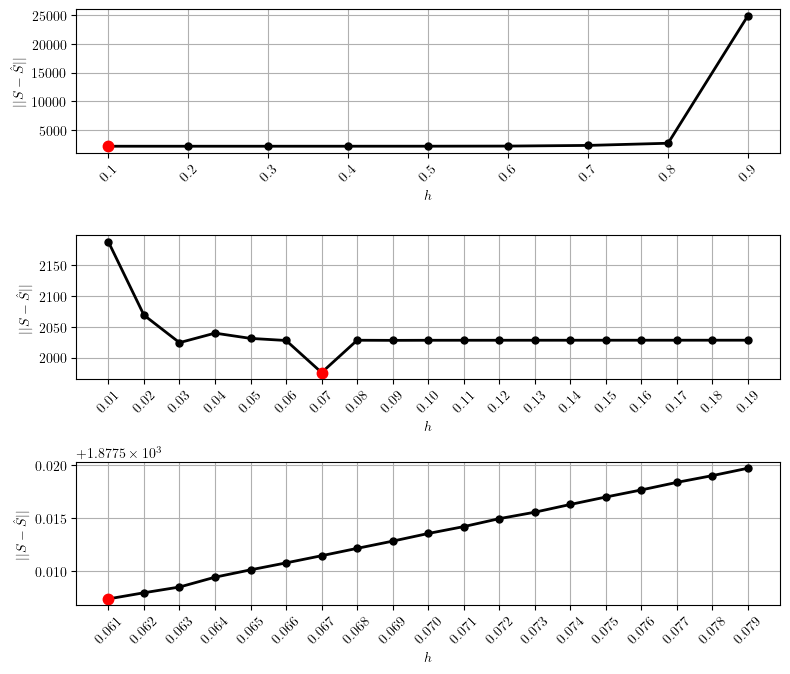

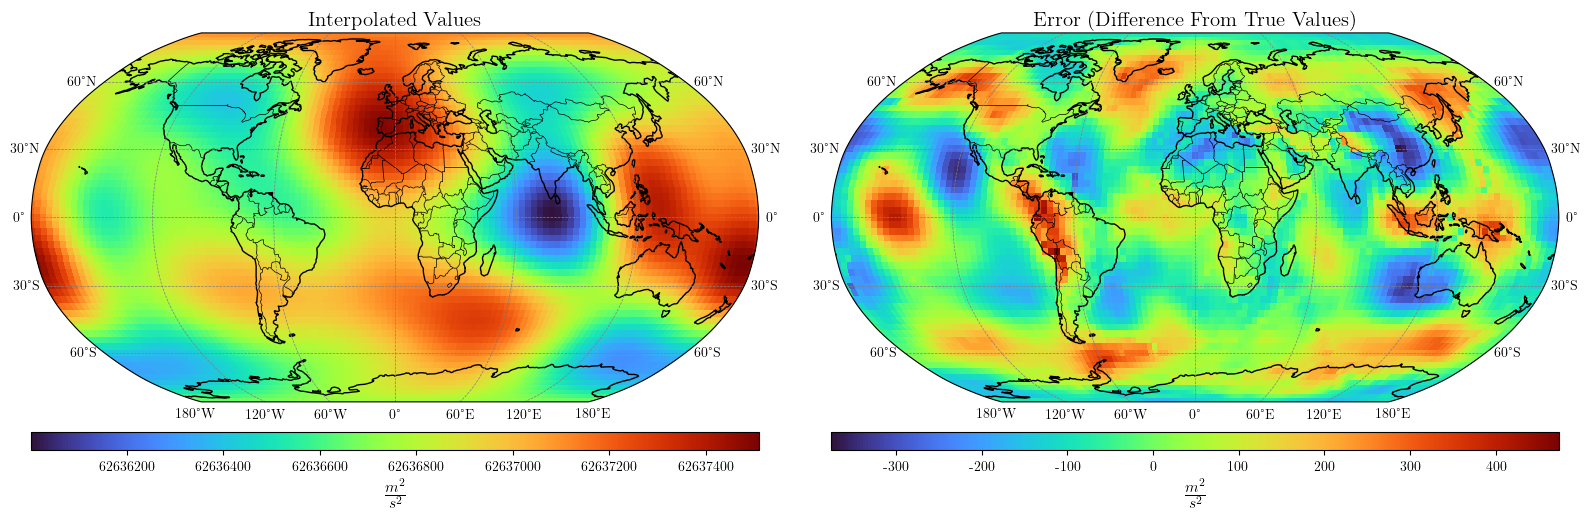

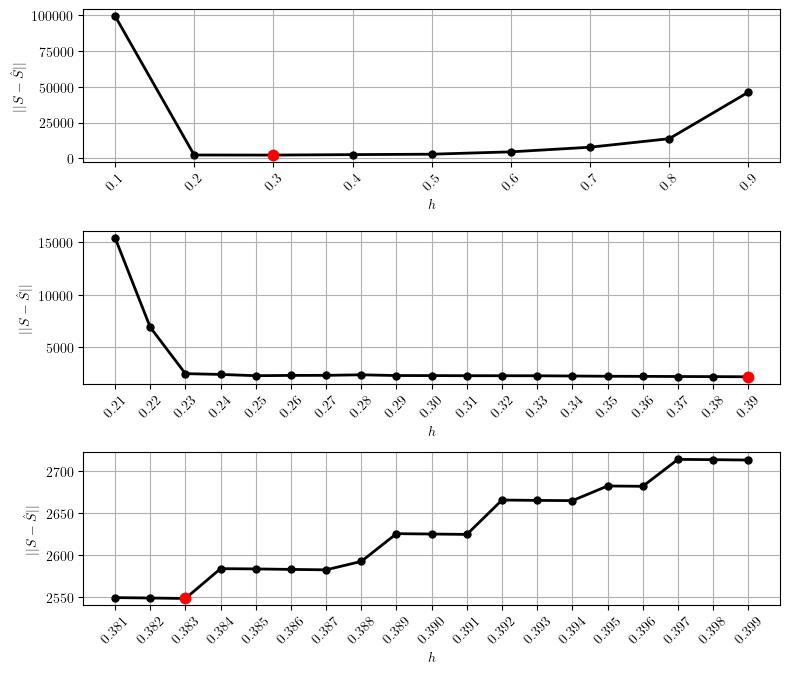

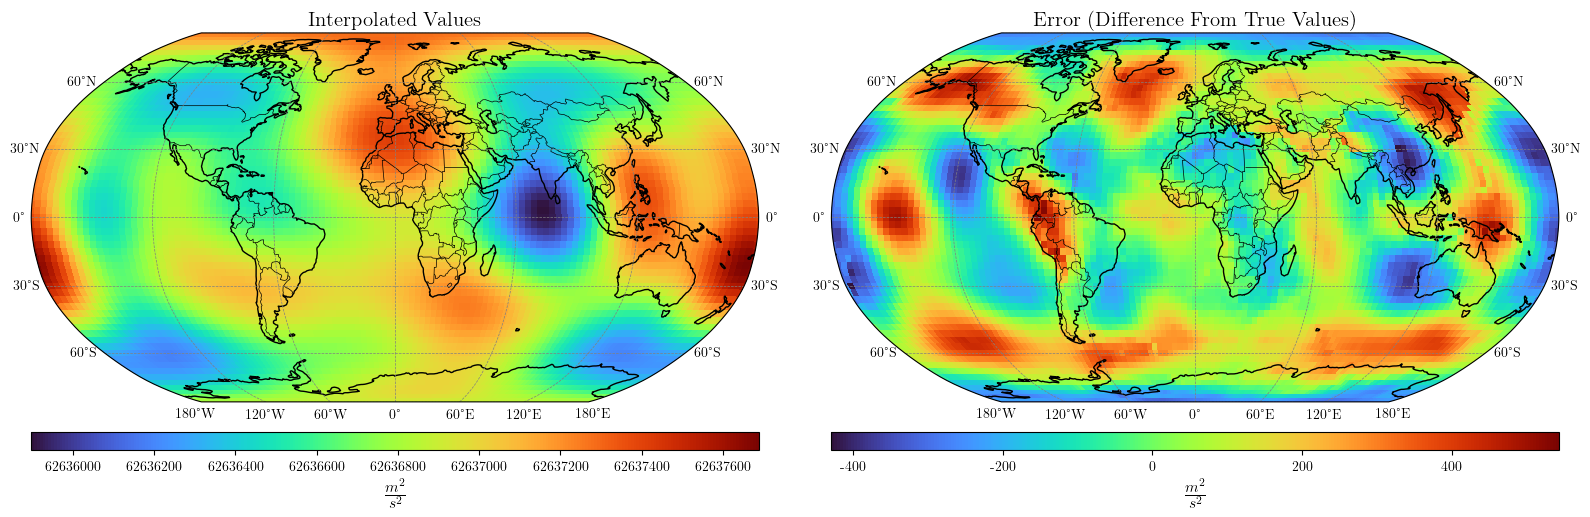

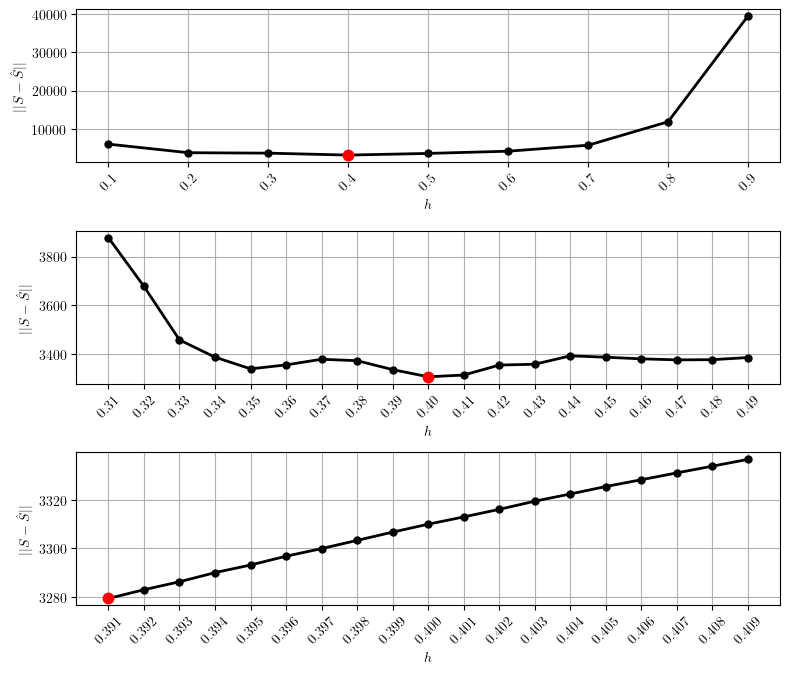

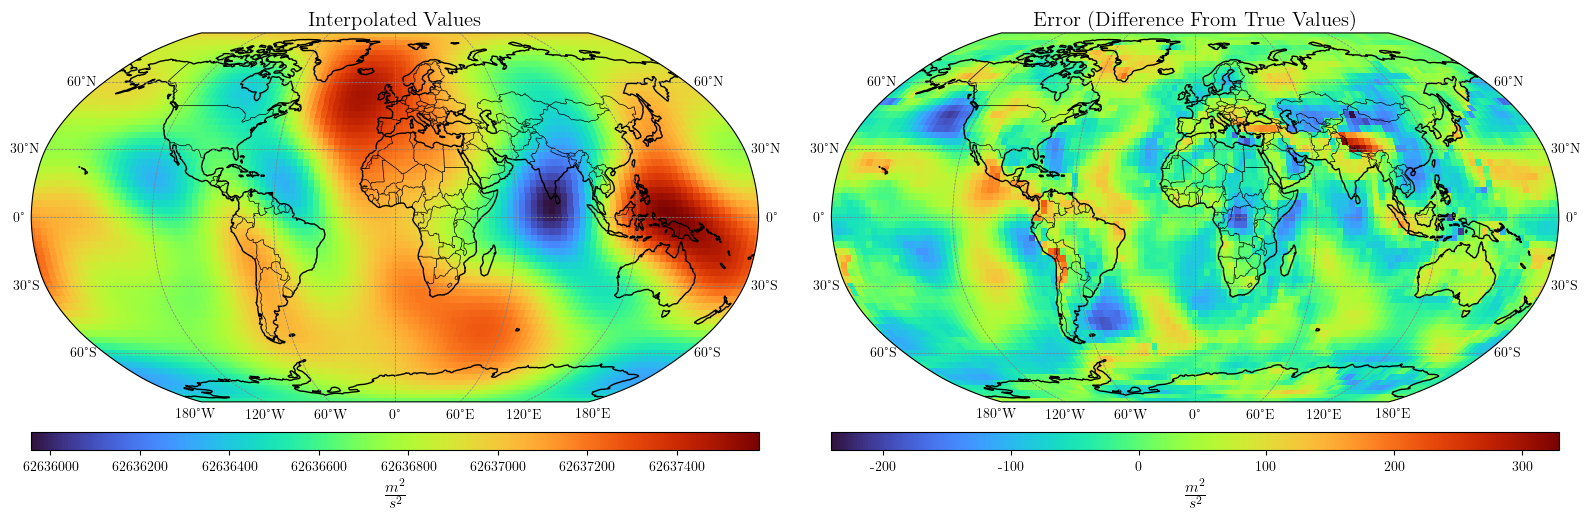

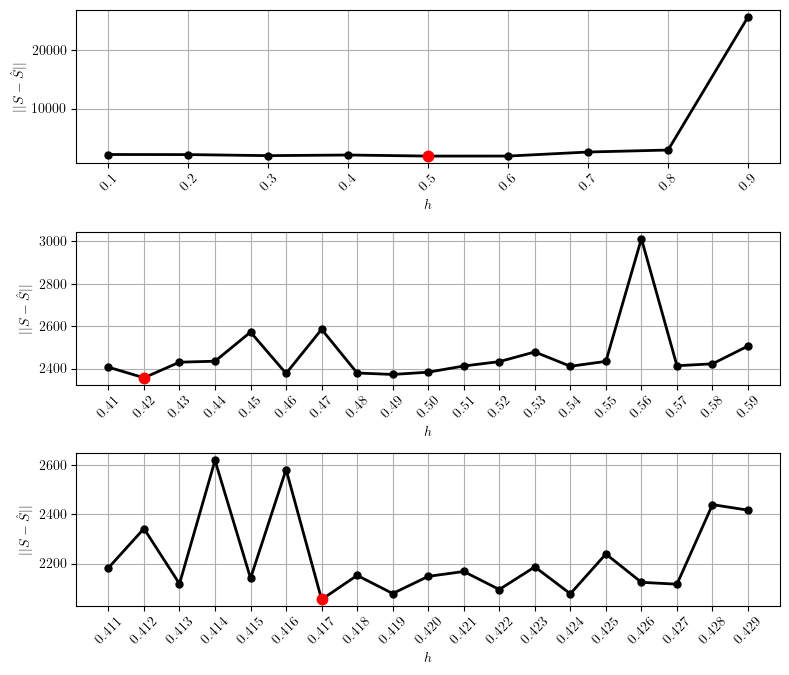

In [5]:
from scipy.io import loadmat

# -----------------------------------------
noise_flag = True
save_flag = True
suptitle_flag = False
# -----------------------------------------


kernels = ['Abel-Poisson', 'Singularity', 'Logarithmic'] 
methods = ['Cholesky', 'TSVD', 'GCV', 'L-Curve', 'VCE']


if noise_flag:
    noise_str = 'wn_'
else:
    noise_str = ''
    
save_format = '.pdf'
save_dir = './Plots/'
mat_dir = './Set01/'
save_dpi = 72

    
for kernel in kernels:
    for method in methods:

        file_path = mat_dir + 'Output_' + noise_str + kernel + '_' + method + '.mat'
        save_filename1 = 'Plot_' + noise_str + kernel + '_' + method
        save_filename2 = 'CV_' + noise_str + kernel + '_' + method
        if suptitle_flag:
            title_sup = 'Kernel: ' + kernel + ' - ' + 'Method: ' + method
        else:
            title_sup = ''
            
        mat_data = loadmat(file_path)
        main_data = mat_data['main_data']
        valid_data = mat_data['valid_data']
        if method == methods[0]:
            int = mat_data['int_chol']
            diff = mat_data['diff_chol']
        elif method == methods[1]:
            int = mat_data['int_tsvd']
            diff = mat_data['diff_tsvd']
        elif method == methods[2]:
            int = mat_data['int_gcv']
            diff = mat_data['diff_gcv']
        elif method == methods[3]:
            int = mat_data['int_lcurve']
            diff = mat_data['diff_lcurve']
        elif method == methods[4]:
            int = mat_data['int_vce']
            diff = mat_data['diff_vce']
        dec1 = mat_data['h_dec1']
        dec2 = mat_data['h_dec2']
        dec3 = mat_data['h_dec3']
            
        PlotRes(valid_data[:, 0], valid_data[:, 1], int, 'Interpolated Values', 
                valid_data[:, 0], valid_data[:, 1], diff, 'Error (Difference From True Values)',
                title_sup, save_flag, save_format, save_dir, save_filename1, save_dpi, True)
        
        PlotCV(dec1, dec2, dec3, title_sup, save_flag, save_format, save_dir, save_filename2)


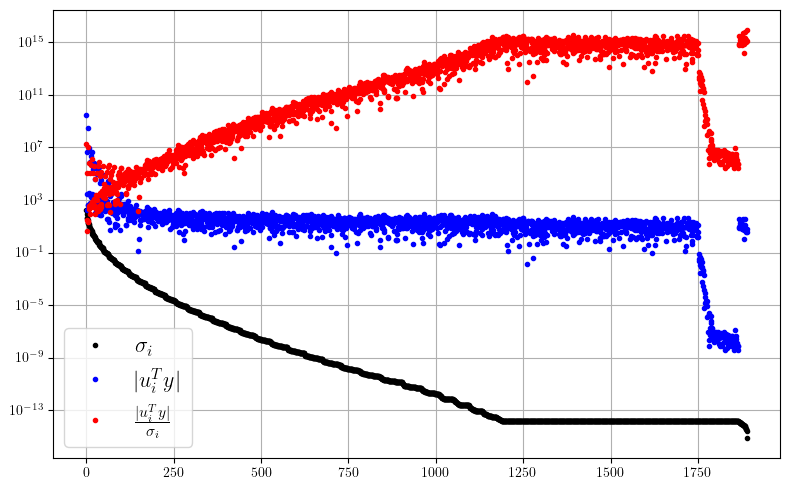

In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

save_flag = True

save_format = '.pdf'
save_dir = './Plots/'
save_dpi = 72

mat_data = loadmat('Picard_test.mat')
pp = mat_data['pp']

plt.figure(figsize=(8,5))
plt.semilogy(pp[:,0], marker='.', linestyle='none', color='k', label='$\\sigma_i$')
plt.semilogy(pp[:,1], marker='.', linestyle='none', color='b', label='$|u_i^Ty|$')
plt.semilogy(pp[:,2], marker='.', linestyle='none', color='r', label='$\\frac{|u_i^Ty|}{\\sigma_i}$')
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
if save_flag:
    plt.savefig(save_dir+'/'+'PicardPlot'+save_format, bbox_inches='tight', dpi=save_dpi)
plt.show()


In [20]:
import numpy as np

# 'Abel-Poisson', 'Singularity', 'Logarithmic'
kernels = ['Abel-Poisson'] 
methods = ['Cholesky', 'TSVD', 'GCV', 'L-Curve', 'VCE']

noise_flag = True

if noise_flag:
    noise_str = 'wn_'
else:
    noise_str = ''
    
mat_dir = './Set01/'

    
for kernel in kernels:
    for method in methods:

        file_path = mat_dir + 'Output_' + noise_str + kernel + '_' + method + '.mat'
        
        mat_data = loadmat(file_path)
        main_data = mat_data['main_data']
        valid_data = mat_data['valid_data']
        if method == methods[0]:
            int = mat_data['int_chol']
            diff = mat_data['diff_chol']
            Lambda = 'NA'
        elif method == methods[1]:
            int = mat_data['int_tsvd']
            diff = mat_data['diff_tsvd']
            Lambda = mat_data['k']
        elif method == methods[2]:
            int = mat_data['int_gcv']
            diff = mat_data['diff_gcv']
            Lambda = mat_data['lambda']
        elif method == methods[3]:
            int = mat_data['int_lcurve']
            diff = mat_data['diff_lcurve']
            Lambda = mat_data['lambda']
        elif method == methods[4]:
            int = mat_data['int_vce']
            diff = mat_data['diff_vce']
            Lambda = mat_data['lambda']
        dec3 = mat_data['h_dec3']
        idx = np.argmin(dec3[:, 1])
        h = dec3[idx, 0]
        
        print(f'{kernel} , {method}\nnorm = {np.round(np.linalg.norm(diff), 4)}\nmean = {np.round(np.mean(diff), 4)}\nh = {h}\nLambda = {Lambda}\n\n')


Abel-Poisson , Cholesky
norm = 5840.2691
mean = 0.1131
h = 0.065
Lambda = NA


Abel-Poisson , TSVD
norm = 5735.7724
mean = 1.1173
h = 0.381
Lambda = [[145]]


Abel-Poisson , GCV
norm = 8289.586
mean = 4.1071
h = 0.121
Lambda = [[3.50395681e-06]]


Abel-Poisson , L-Curve
norm = 21767.4379
mean = 13.5542
h = 0.20100000000000004
Lambda = [[0.00053393]]


Abel-Poisson , VCE
norm = 6836.7964
mean = -3.1657
h = 0.17300000000000001
Lambda = [[1.00000000e+00]
 [3.24002133e-05]
 [2.37801885e-07]
 [2.02712762e-07]
 [2.04002827e-07]
 [2.03391244e-07]]


